# Behavior Analysis: % Total Frames Per Behavior

Press SHIFT + ENTER to run code

### USER INPUT!

In [1]:
## Define project
project_name = 'project_acc_MiniscopeCap'

# Select group and condition, see meta.py to see how you previously defined it for your project
selected_groups = ['Combined']
selected_conditions = ['A_baseline','B_exp_cap','C_baseline_morphine','D_exp_morphine-cap']


### Main Code: Create Pie Graph of Total Frames Per Behavior

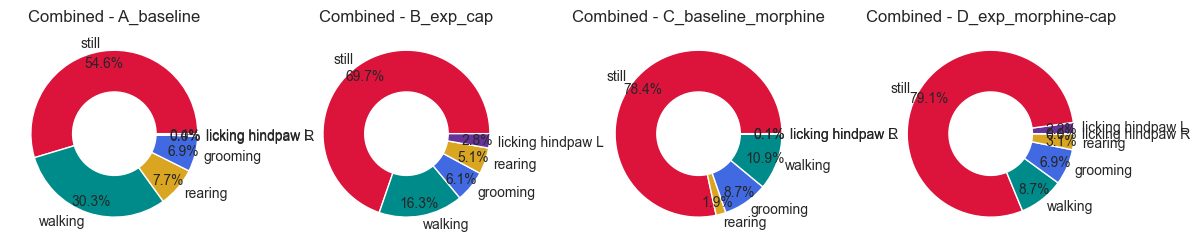

In [4]:
###### RUN DEPENDENCIES ######
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))
from utils.classification import load_behaviors
from utils.meta import *

###### Load Behaviors ######
behaviors = load_behaviors(f"../processed_dataset/{project_name}/behaviors_{project_name}.pkl")

# Define the directory path
directory_path = f"../processed_dataset/{project_name}/figures/behavior_total-frames"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    
rows = len(selected_groups)
cols = len(selected_conditions)
count = 0

# Create subplots with a slightly larger figure size
fig, ax = plt.subplots(rows, cols, figsize=(14, 11))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Flatten ax if either rows or cols is 1
if rows == 1 or cols == 1:
    ax = np.atleast_1d(ax).flatten()

for row in range(rows):
    if row > 4:
        cols = 1
        if cols > 1:
            fig.delaxes(ax[row * cols + 1])
            fig.delaxes(ax[row * cols + 2])
    else:
        cols = len(selected_conditions)
        
    for col in range(cols):
        
        selected_group = selected_groups[row]
        selected_condition = selected_conditions[col]
        
        predict_dict = {'condition': np.repeat(selected_condition, 
                                               len(np.hstack([behaviors[selected_group][selected_condition][f'file{i}'] 
                                                              for i in range(len(behaviors[selected_group][selected_condition]))]))),
                        'behavior': np.hstack([behaviors[selected_group][selected_condition][f'file{i}'] 
                                               for i in range(len(behaviors[selected_group][selected_condition]))])}
        df_raw = pd.DataFrame(data=predict_dict)
        labels = df_raw['behavior'].value_counts(sort=False).index
        values = df_raw['behavior'].value_counts(sort=False).values
        # summary dataframe
        df = pd.DataFrame()
        behavior_labels = []
        for l in labels:
            behavior_labels.append(behavior_names[int(l)])
        df["values"] = values
        df['labels'] = behavior_labels
        df["colors"] = df["labels"].apply(lambda x:
                                          behavior_colors[behavior_names.index(x)])  # to connect Column value to Color in Dict
        df.to_csv(f"../processed_dataset/{project_name}/figures/behavior_total-frames/behavior_total_frames_{project_name}_{selected_group}-{selected_condition}.csv")

        # Pie Chart
        ax_index = row * cols + col
        ax[ax_index].pie(df['values'],
                         colors=df['colors'], 
                         labels=df['labels'],
                         autopct='%1.1f%%', 
                         pctdistance=0.85)
        # draw circle
        centre_circle = plt.Circle((0, 0), 
                                   0.50, 
                                   fc='white')
        # Adding Circle in Pie chart
        ax[ax_index].add_artist(centre_circle)
        ax[ax_index].set_title(f'{selected_group} - {selected_condition}')
        count += 1
        
        fig.savefig(f"../processed_dataset/{project_name}/figures/behavior_total-frames/behavior_total-frames_{project_name}.svg", 
            dpi=600, bbox_inches='tight')

plt.show()

# ANALYSIS COMPLETE!